Author: **Kajetan Bochajczuk**

*Importing of all necessary libraries and tuning some of the global settings.*

In [1]:
import numpy as np  # For numerical calculations
import matplotlib 
import matplotlib.pyplot as plt  # For plotting
import pandas as pd  # For reading external data and displaying in tabular form
import sklearn.linear_model  # For calculating linear regression

In [2]:
matplotlib.rcParams['figure.figsize'] = [12, 10]
matplotlib.rcParams['figure.dpi'] = 600
matplotlib.rc('font', family='Lato', size=12)

# LS estimator of a linear model
Use the data file `data_lab_2.xlsx` from the webstie. The first column of the data set is the dependent variable $Y$, whereas the remaining columns descibe the explanatory variables $X$. Let's assume that

$$
y_n = x_n \alpha + u_n \text, \quad \text{for } n = 1, \dots, N
$$

Suppose, the loss function is

$$
L = \sum_{n=1}^N u_n^2 \text.
$$

We can rewrite the above model as
$$
Y = X \alpha + u
$$
where
$$
\begin{align}
Y &\in \mathbf R^{N \times 1} \\
X &\in \mathbf R^{N \times 3} \\
\alpha &\in \mathbf R^{3 \times 1} \\
u &\in \mathbf R^{N \times 1} \sim \mathcal N(0, I_N)\\
\end{align}
$$
and $N$ is the sample size.

Then
$$
L = u^\intercal u
\text.
$$


## Exercise
Express the loss function, $L$ as a function of $Y$, $X$ and $\alpha$.

**Answer:** Rearranging the first equation and supplying to the definition of the loss function $L$ we obtain

$$
L = (Y - X\alpha)^\intercal (Y - X\alpha)
\text.
$$

## Exercise
Derive the first derivative of the function $L$ with respect to the vector of parameters $\alpha$ as a function of $Y$, $X$ and $\alpha$.

**Answer:** 
The derivative
$$
\frac{\partial}{\partial\alpha}L
$$
will be a matrix of vector of length $3$ (as $L(\alpha): \mathbf{R^3} \rightarrow \mathbf R $).

We also know that
$$
\frac{\partial g(\beta)^\intercal g(\beta)}{\partial\beta^\intercal} = 
2 g(\beta)^\intercal \frac{\partial g(\beta)}{\partial\beta^\intercal}
\text.
$$

We can apply the above formula to $L$ and calculate the result
$$
\frac{\partial(Y - X \alpha)^\intercal(Y - X \alpha)}{\partial\alpha^\intercal} = 
2 (Y - X \alpha)^\intercal \frac{\partial(Y - X \alpha)}{\partial\alpha^\intercal} = 
-2 (Y - X \alpha)^\intercal X
\text.
$$

## Exercise
Since the estimator minimizes $L$, write down the relevant First Order Condintion. What is the LS esitmator of the model parameters?

**Answer:**
We write down the first order condition for $\alpha$, i.e.

$$
\frac{\partial}{\partial\alpha} L = 0
$$

thus

$$
-2 (Y - X \hat\alpha)^\intercal X = 0^\intercal
$$

dividing by $-2$ we get

$$
(Y - X \hat\alpha)^\intercal X = 0^\intercal
$$

and transposing both sides

$$
X^\intercal (Y - X \hat\alpha) = 0
\text.
$$

Rearranging the terms we arrive at the final value

$$
X^\intercal Y - X^\intercal X \hat\alpha = 0
$$
$$
X^\intercal X \hat\alpha = X^\intercal Y
$$
$$
\hat\alpha = (X^\intercal X)^{-1} X^\intercal Y
\text.
$$

### Comparison of the results with python implementation
We can compare the obtained result with the `linregress` function from the `scipy.stats` library.

First we load the data and display first few rows to check if everything is fine.

In [3]:
data = pd.read_excel('data_lab_2.xlsx', header=None)
data.columns = ['Y', 'X1', 'X2', 'X3']  # Renaming the columns
data.head()

,Y,X1,X2,X3
0,8.301069,1.255952,4.007507,2.134730
1,13.394371,2.695934,3.754338,4.092859
2,13.841512,4.220832,3.336009,3.163189
3,13.633060,2.002327,5.399626,4.052547
4,13.214946,3.134454,4.915782,1.429284


We will also assign adequate columns to `X` and `y` variables to simplify later code

In [4]:
X = data[['X1', 'X2', 'X3']].values
y = data['Y'].values

Then we can simply calculate the estimators - one using the obtained formula, second using external function.

In [5]:
# External implementation
model = sklearn.linear_model.LinearRegression(fit_intercept=False)
model.fit(X, y)
# Internal implementation
alpha = np.linalg.inv(X.T @ X) @ X.T @ y

In [6]:
print(f"External function: {model.coef_}")
print(f"Internal function: {alpha}")

External function: [2.05859907 1.07475576 0.88974064]
Internal function: [2.05859907 1.07475576 0.88974064]


As we can see the results are exactly the same!

## Exercise
If the resudials are uncorrelated and homoscedastic, what is the variance-covariance matrix $\mathbf{Cov}(\cdot)$ of the estimator $\sqrt N \hat\alpha$, where $N$ is the sample size? 

**Answer:** Uncorrelated and homosedastic residuals means that:
$$
\mathbf{Cov}u = \sigma I_N 
$$
We thus have
$$
\begin{align}
& \mathbf{Cov}\sqrt N\hat\alpha = \\
& = N \mathbf{Cov} \hat\alpha = \\
& = N \mathbf{Cov} ((X^\intercal X)^{-1} X ^\intercal(X \alpha + u)) = \\
& = N \mathbf{Cov} ((X^\intercal X)^{-1} X ^\intercal u) = \\
& = N (X^\intercal X)^{-1} X ^\intercal \mathbf{Cov}u ((X^\intercal X)^{-1} X ^\intercal)^\intercal = \\
& = N \sigma (X^\intercal X)^{-1} X ^\intercal I_N ((X^\intercal X)^{-1} X ^\intercal)^\intercal = \\
& = N \sigma (X^\intercal X)^{-1} X ^\intercal X ((X^\intercal X)^{-1})^\intercal = \\
& = N \sigma (X^\intercal X)^{-1}
\text.
\end{align}
$$

# A linear model with restrictions
Use the data and model specification from Exercise 1. Suppose, you know that $\alpha_1 + \alpha_2 + \alpha_3 = 0$ and $\alpha_2 - \alpha_3 = 0$.

## Exercise
Write down the restriciton matrix. What is the rank of this matrix?

**Answer:**
We have that

$$
\alpha = 
\begin{bmatrix}
\alpha_1 \\
\alpha_2 \\
\alpha_3 \\
\end{bmatrix}
\text.
$$

And we can write above restrictions as:

$$
\begin{bmatrix}
0 \\
0
\end{bmatrix}= 
\begin{bmatrix}
1 & 1 & 1 \\
0 & 1 & -1 \\
\end{bmatrix}
\begin{bmatrix}
\alpha_1 \\
\alpha_2 \\
\alpha_3 \\
\end{bmatrix}
$$

We can clearly see that we are dealing with two lineray independent vectors so the **rank of the restrictions matrix is equal to $2$**.

## Exercise
Express the vector $\alpha$ and the loss function $L$ as a functions of $\alpha_3$.

**Answer:** Rearraning the restrictions we get
$$
\alpha_2 = \alpha_3
$$
$$
\alpha_1 = -\alpha_2 - \alpha_3 = -2\alpha_3
$$
so we can write
$$
\alpha = 
\begin{bmatrix}
-2 \alpha_3 \\
\alpha_3 \\
\alpha_3 \\
\end{bmatrix}
\text.
$$

Supplying above to the $L$ loss function we get

$$
L = \sum_{n=1}^N \left( y_n + 2\alpha_3 x_{1n} - \alpha_3 x_{2n} - \alpha_3 x_{3n} \right) ^ 2 =
\sum_{n=1}^N \left( y_n + \alpha_3 (2x_{1n} - x_{2n} - x_{3n}) \right) ^ 2
\text.
$$

## Exercise
Estimate $\alpha_3$ with the LS method. Compute its variance-covariance matrix. What is the estimator of $\alpha$?

**Answer:**

$$
\begin{align}
& \frac{\partial}{\partial\alpha_3} L  = \\
& = \frac{\partial}{\partial\alpha_3} \sum_{n=1}^N \left( y_n + \alpha_3 (2x_{1n} - x_{2n} - x_{3n}) \right) ^ 2 = \\
& = \sum_{n=1}^N 2 (2x_{1n} - x_{2n} - x_{3n}) \left( y_n + \alpha_3 (2x_{1n} - x_{2n} - x_{3n}) \right) = \\
& = 2 \sum_{n=1}^N y_n (2x_{1n} - x_{2n} - x_{3n}) + \alpha_3 \sum_{n=1}^N (2x_{1n} - x_{2n} - x_{3n})^2\text.
\end{align}
$$

We compare the above to zero

$$
2 \sum_{n=1}^N y_n (2x_{1n} - x_{2n} - x_{3n}) + \alpha_3 \sum_{n=1}^N (2x_{1n} - x_{2n} - x_{3n})^2 = 0
$$

and obtain

$$
\hat\alpha_3 = \frac{-2 \sum_{n=1}^N y_n (2x_{1n} - x_{2n} - x_{3n})}{\sum_{n=1}^N (2x_{1n} - x_{2n} - x_{3n})^2}
\text.
$$

# Partial LS
Lets consider a model

$$
y_n = \alpha_1 x_{1n} + \alpha_2 x_{2n} + \epsilon_n
$$

with $\alpha_1 = \alpha_2 = 1$ and $\epsilon_n \sim \mathcal N(0, 1)$.

## Exercise
Generate a sample of $Y$ for (a) $X_1$ and $X_2$ independent: $X \sim \mathcal N(0, I_2)$, (b) for $X_1$ and $X_2$ dependent: $X \sim \mathcal N(0, \Sigma)$ for $\Sigma = [1, \rho; \rho, 1]$, $\rho = 0.6$.

**Answer:**

At the beginning we generate $X_A$ and $X_B$

In [7]:
SAMPLE_SIZE = 1000
# (a)
x_a = np.random.multivariate_normal(mean=np.zeros(2), cov=[[1, 0], [0, 1]], size=SAMPLE_SIZE)
# (b)
RHO = 0.6
x_b = np.random.multivariate_normal(mean=np.zeros(2), cov=[[1, RHO], [RHO, 1]], size=SAMPLE_SIZE)

and the errors $\epsilon_n$

In [8]:
epsilon = np.random.normal(size=SAMPLE_SIZE)

To calculate corresponding $Y_A$ and $Y_B$ we will rewrite the initial model into matrix/vector form to both simplify and speed up the implementation. 

We have 

$$
Y = X \alpha + \epsilon
$$
where
$$
\begin{align}
Y \in \mathbf R^{N \times 1} \\
X \in \mathbf R^{N \times 2} \\
\alpha \in \mathbf R^{2 \times 1} \\
\epsilon \in \mathbf R^{N \times 1} \\
\end{align}
$$
and $N$ is the sample size.

In [9]:
ALPHA = np.array([1, 1])

In [10]:
y_a = np.dot(x_a, ALPHA) + epsilon
y_b = np.dot(x_b, ALPHA) + epsilon

To see difference in the random variables we also generate theirs histograms.

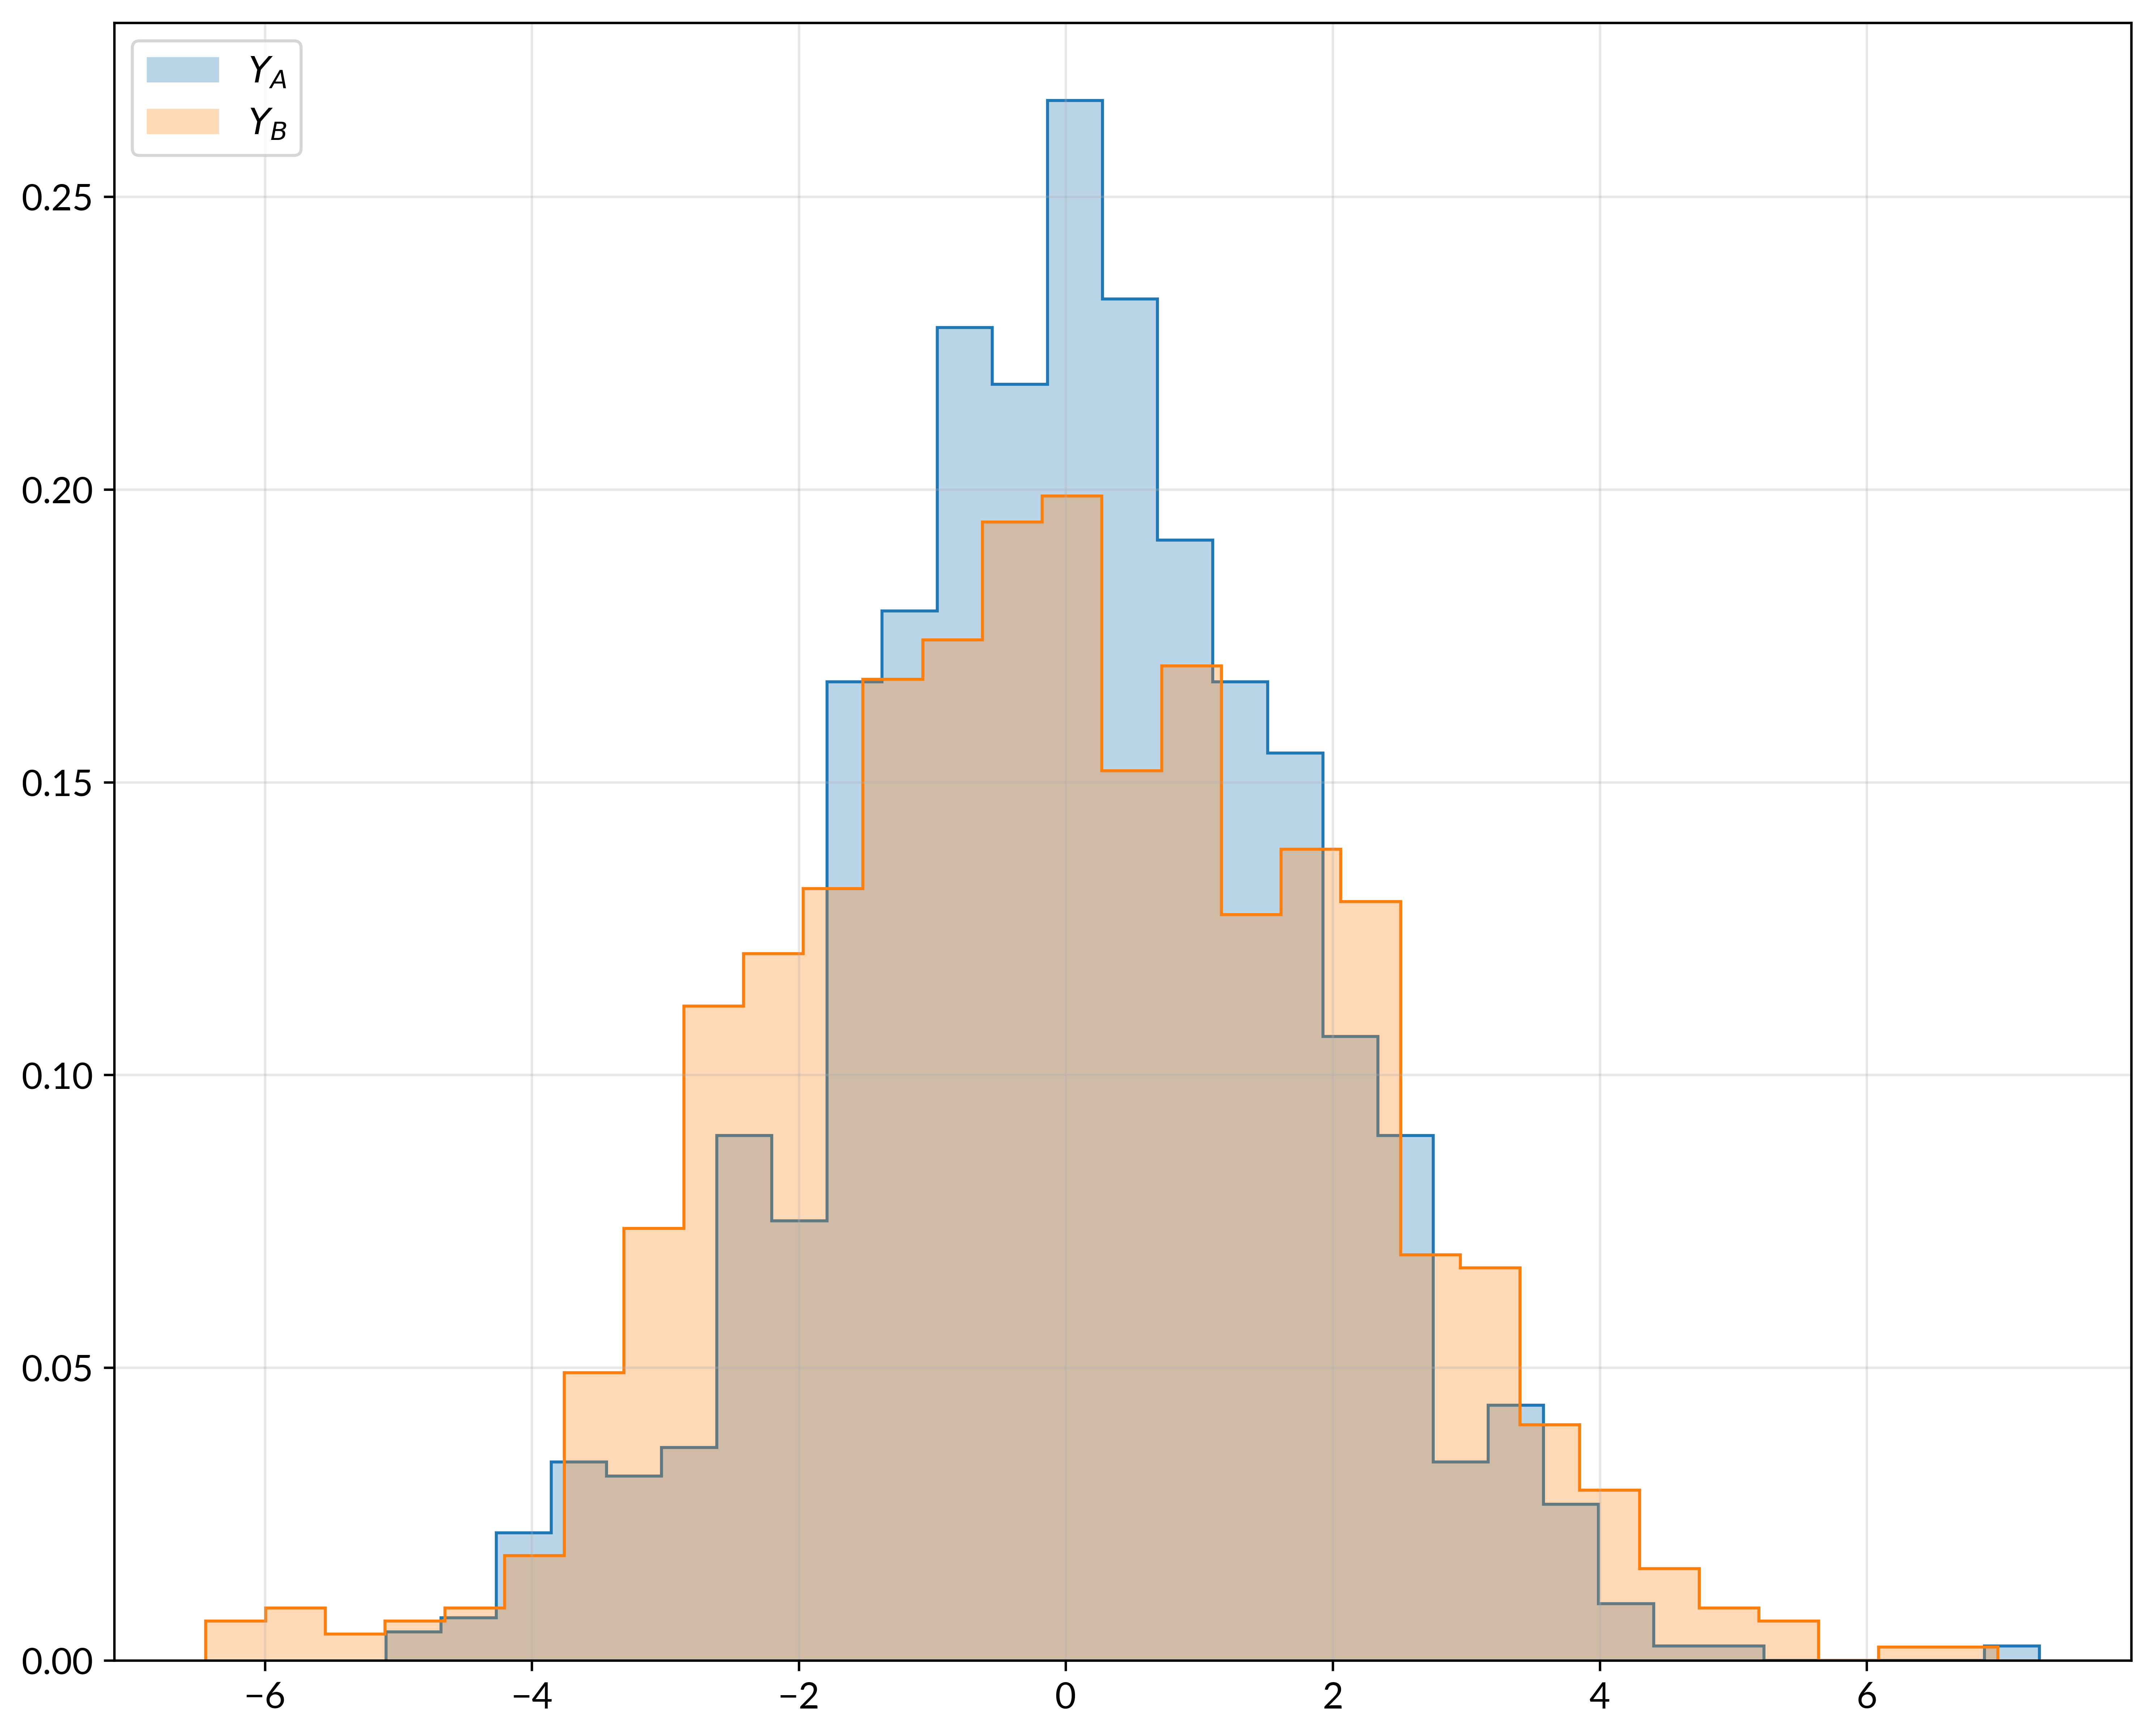

In [11]:
plt.hist(y_a, bins=30, density=True, histtype='step', color='tab:blue')
plt.hist(y_a, bins=30, density=True, alpha=0.3, color='tab:blue', label="$Y_A$")
plt.hist(y_b, bins=30, density=True, histtype='step', color='tab:orange')
plt.hist(y_b, bins=30, density=True,alpha=0.3, color='tab:orange', label="$Y_B$")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

## Exercise
Estimate the parameter $\alpha_1$ in the true model: $y_n = \alpha_1 x_{1n} + \alpha_2 x_{2n} + \epsilon_n$ and a corresponding parameter $\beta$ in a miss-specified model: $y_n = \beta x_{1n} + u_n$.

**Answer:**

We can simply use the formula we derived previously:

In [12]:
alpha_a = np.linalg.inv(x_a.T @ x_a) @ (y_a.T @ x_a)
alpha_b = np.linalg.inv(x_b.T @ x_b) @ (y_b.T @ x_b)

In [13]:
print(alpha_a)
print(alpha_b)

[0.99434709 0.9899461 ]
[1.02917734 0.98644215]


As we can see the results lie very close to $[1, 1]^\intercal$ vector.

In the second model we are only considering the first column of the $X$ matrix:

In [14]:
# Because of 1 dimension the inverse simplifies to standard division.
beta_a = (y_a.T @ x_a[:, 0]) / (x_a[:, 0].T @ x_a[:, 0])
beta_b = (y_b.T @ x_b[:, 0]) / (x_b[:, 0].T @ x_b[:, 0])

In [15]:
print(beta_a)
print(beta_b)

0.9911957516530409
1.6179286412467888


The result for the (a) case still lies close to $1$. Because the $X$ columns are independent we can treat each column separately. 

The result for the (b) case is straight up wrong (as assumed).

## Exercise
Compare the true value of $\alpha_1$ with its estimators: $\hat\alpha_1$ and $\hat\beta$ for two cases (a) and (b) and different sample sizes: $N=10$, $100$ and $1000$.

**Answer:**
To be able to repeat the simulations we will enclose previous steps into simple functions

In [16]:
def estimate_alpha_beta(cov, size):
    x = np.random.multivariate_normal(mean=np.zeros(len(cov)), cov=cov, size=size)
    epsilon = np.random.normal(size=size)
    y = x @ ALPHA + epsilon
    alpha = np.linalg.inv(x.T @ x) @ (y.T @ x)
    beta = (y.T @ x[:, 0]) / (x[:, 0].T @ x[:, 0])
    return alpha, beta

Then we estimate $\hat\alpha_1$ and $\hat\beta$ for the two cases and for different sample sizes.

In [17]:
alpha_1_a = []
beta_a = []
alpha_1_b = []
beta_b = []
sizes = np.linspace(10, 1000, num=50, dtype=np.int)
for n in sizes:
    # Case (a)
    alpha, beta = estimate_alpha_beta(cov=[[1, 0], [0, 1]], size=n)
    alpha_1_a.append(alpha[0])
    beta_a.append(beta)
    # Case (b)
    alpha, beta = estimate_alpha_beta(cov=[[1, RHO], [RHO, 1]], size=n)
    alpha_1_b.append(alpha[0])
    beta_b.append(beta)

Lastly we plot the results:

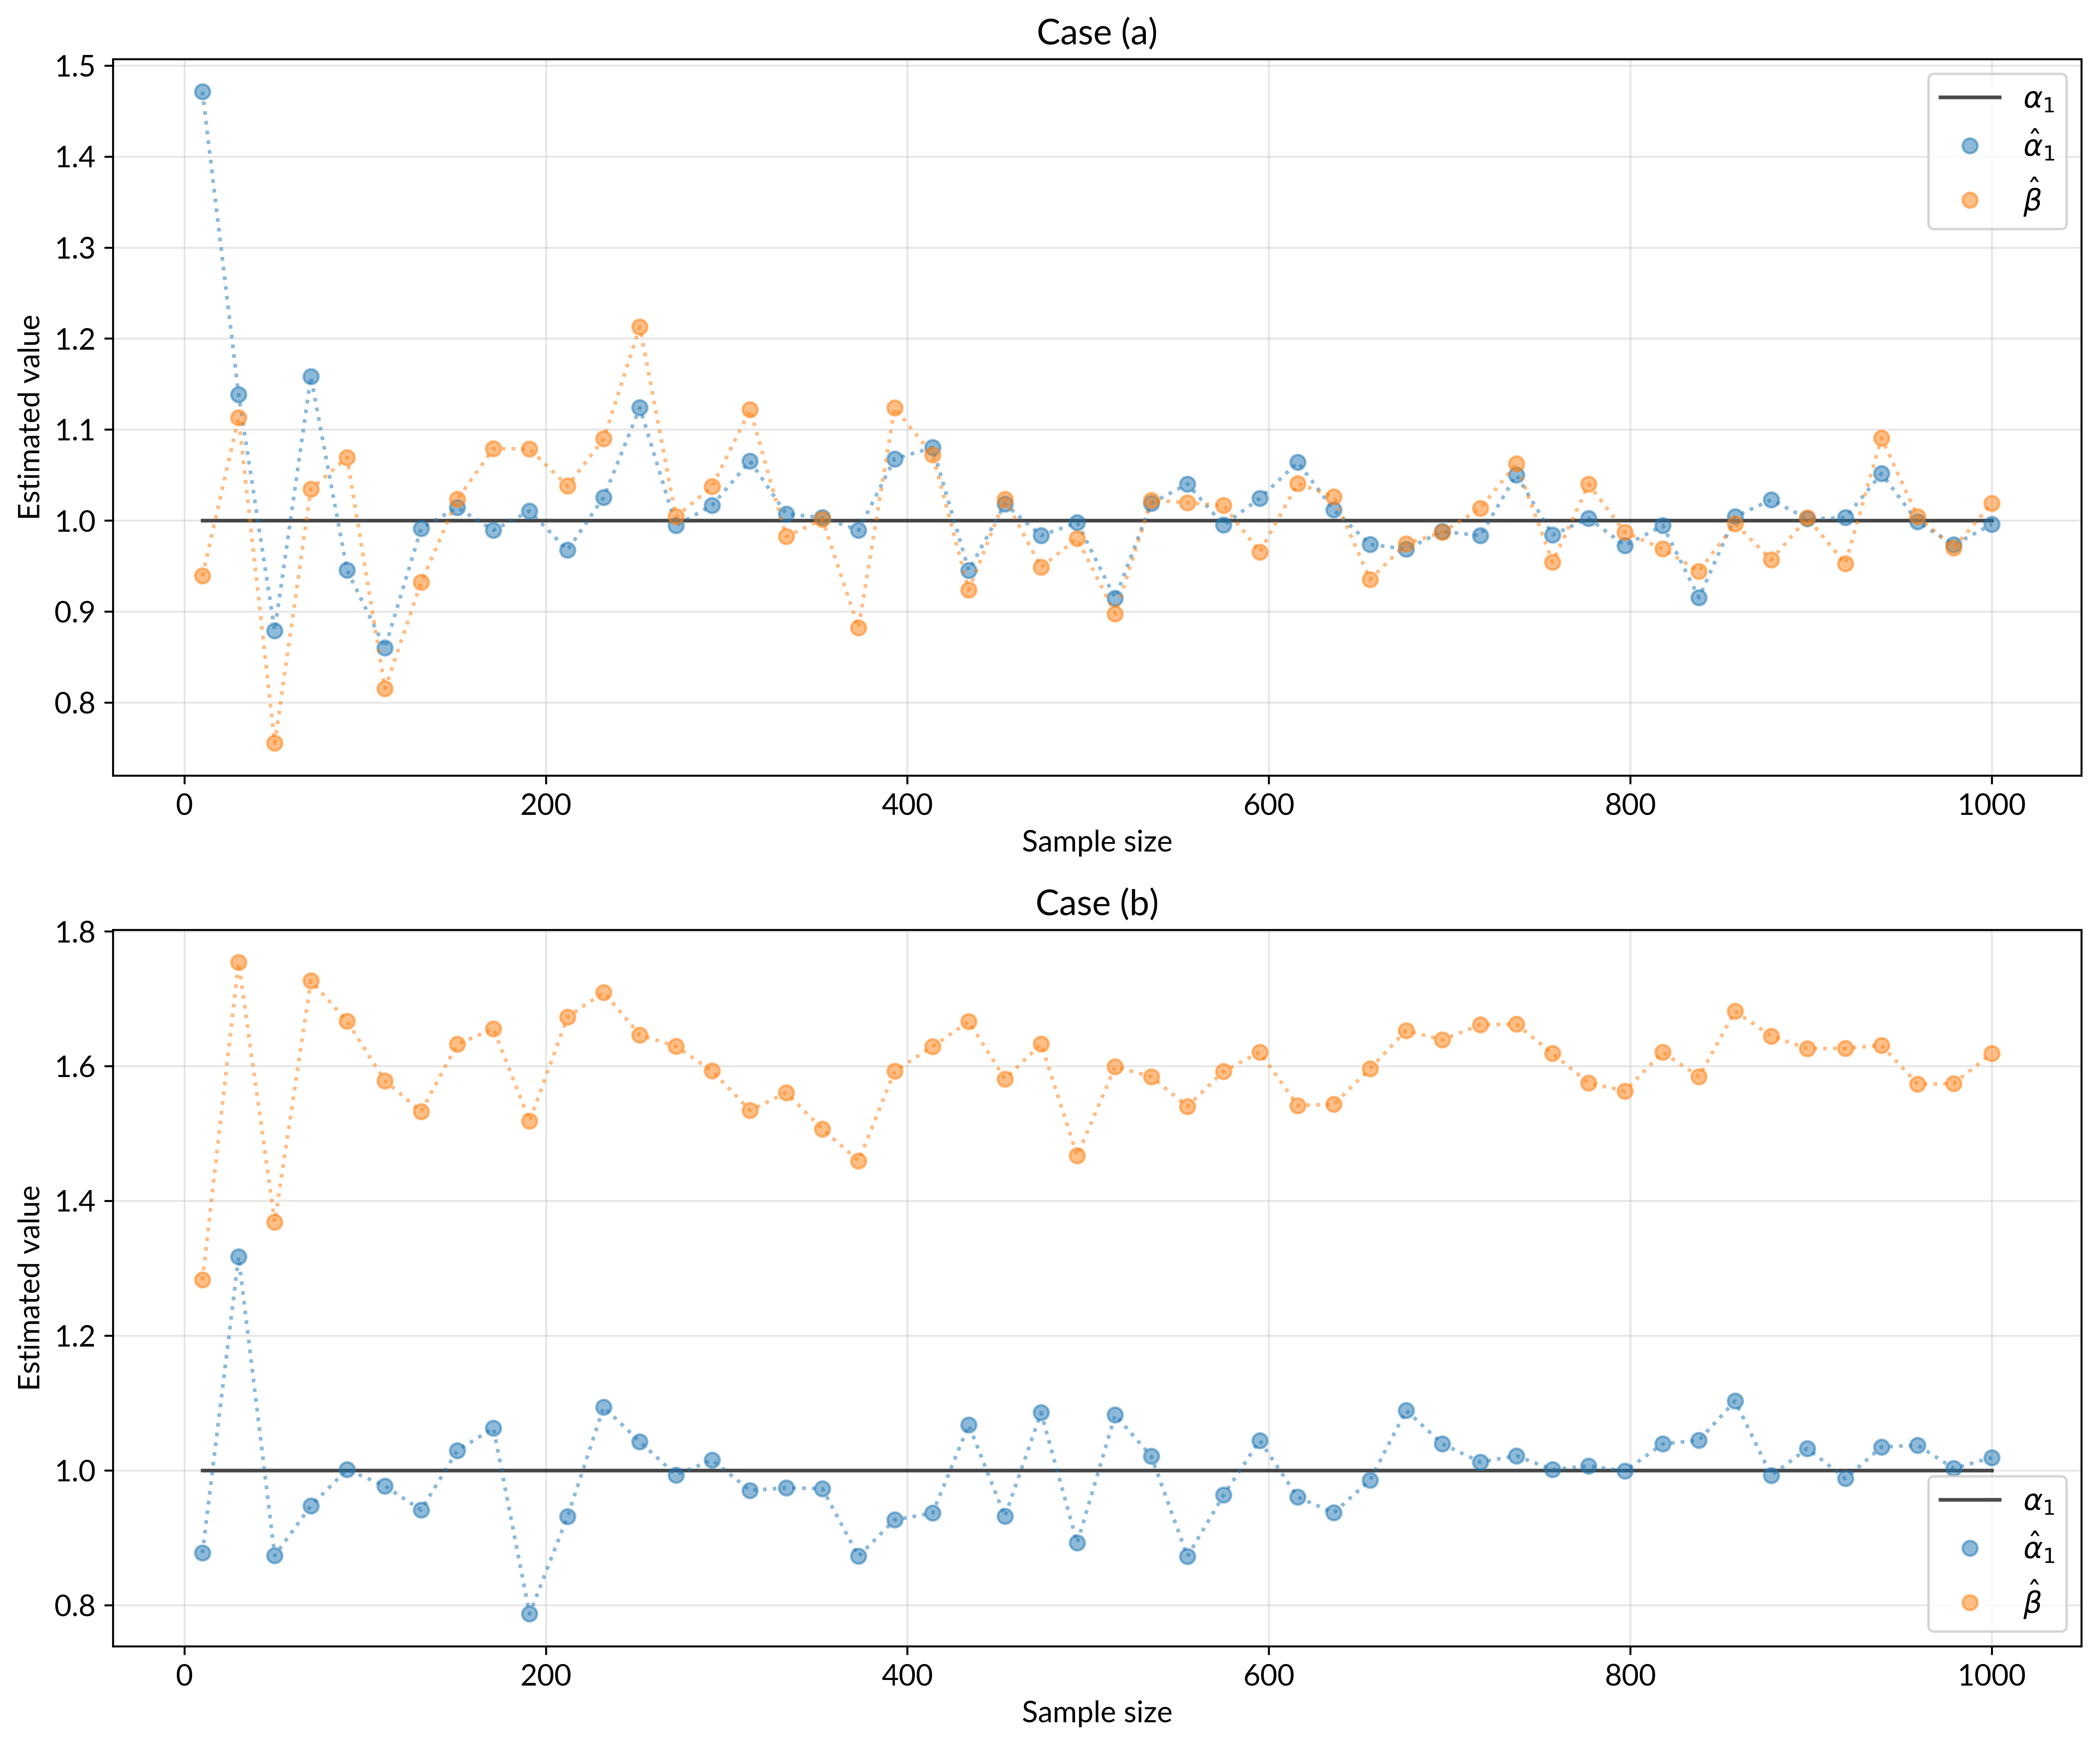

In [18]:
# Case (a) plot
plt.subplot(2, 1, 1)
plt.plot(sizes, ALPHA[0] * np.ones_like(sizes), 'k', alpha=0.7, label=r"$\alpha_1$")
plt.plot(sizes, alpha_1_a, 'o', color="tab:blue", alpha=0.5, label=r"$\hat\alpha_1$")
plt.plot(sizes, alpha_1_a, ':', color="tab:blue", alpha=0.5)
plt.plot(sizes, beta_a, 'o', color="tab:orange", alpha=0.5, label=r"$\hat\beta$")
plt.plot(sizes, beta_a, ':', color="tab:orange", alpha=0.5)
plt.grid(alpha=0.3)
plt.xlabel("Sample size")
plt.ylabel("Estimated value")
plt.title("Case (a)")
plt.legend()
# Case (b) plot
plt.subplot(2, 1, 2)
plt.plot(sizes, ALPHA[0] * np.ones_like(sizes), 'k', alpha=0.7, label=r"$\alpha_1$")
plt.plot(sizes, alpha_1_b, 'o', color="tab:blue", alpha=0.5, label=r"$\hat\alpha_1$")
plt.plot(sizes, alpha_1_b, ':', color="tab:blue", alpha=0.5)
plt.plot(sizes, beta_b, 'o', color="tab:orange", alpha=0.5, label=r"$\hat\beta$")
plt.plot(sizes, beta_b, ':', color="tab:orange", alpha=0.5)
plt.grid(alpha=0.3)
plt.xlabel("Sample size")
plt.ylabel("Estimated value")
plt.title("Case (b)")
plt.legend()

plt.tight_layout()
plt.show()

As we can see in the first case, both estimators approximate the theoretical value (because of the independence of random variables - as mentioned previously), but in the second case we can clearly see that the $\hat\beta$ estimator is nowhere close to the true value.

## Exercise
What can you say about consistency of the estimators? Why in one case the estimator $\hat\beta$ is consistent and in other case not? Comment.

**Answer:**

In the first case the estimator $\hat\beta$ is consistent because columns of the $X$ matrix are independent. Thus we can estimate each parameter separately. 

In the second case, on the other hand, the $X$ random variable is not indepented and we cannot do it. Thus, estimating parameter based only on one column gives wrong result.

## Exercise
Compare the true value of $\alpha_1$ with its estimators: $\hat\alpha_1$ and $\hat\beta$ for $N = 1000$ and different correlation levels (defined at the beginning of this exercise): $\rho = 0.3$, $0.6$ and $0.9$.

**Answer:**

We can use the `estimate_alpha_beta` function defined previously.

In [19]:
alpha_1s = []
betas = []
rhos = np.linspace(0.1, 0.9, num=50)
N = 1000
for rho in rhos:
    alpha, beta = estimate_alpha_beta(cov=[[1, rho], [rho, 1]], size=N)
    alpha_1s.append(alpha[0])
    betas.append(beta)

Then we simply plot the results

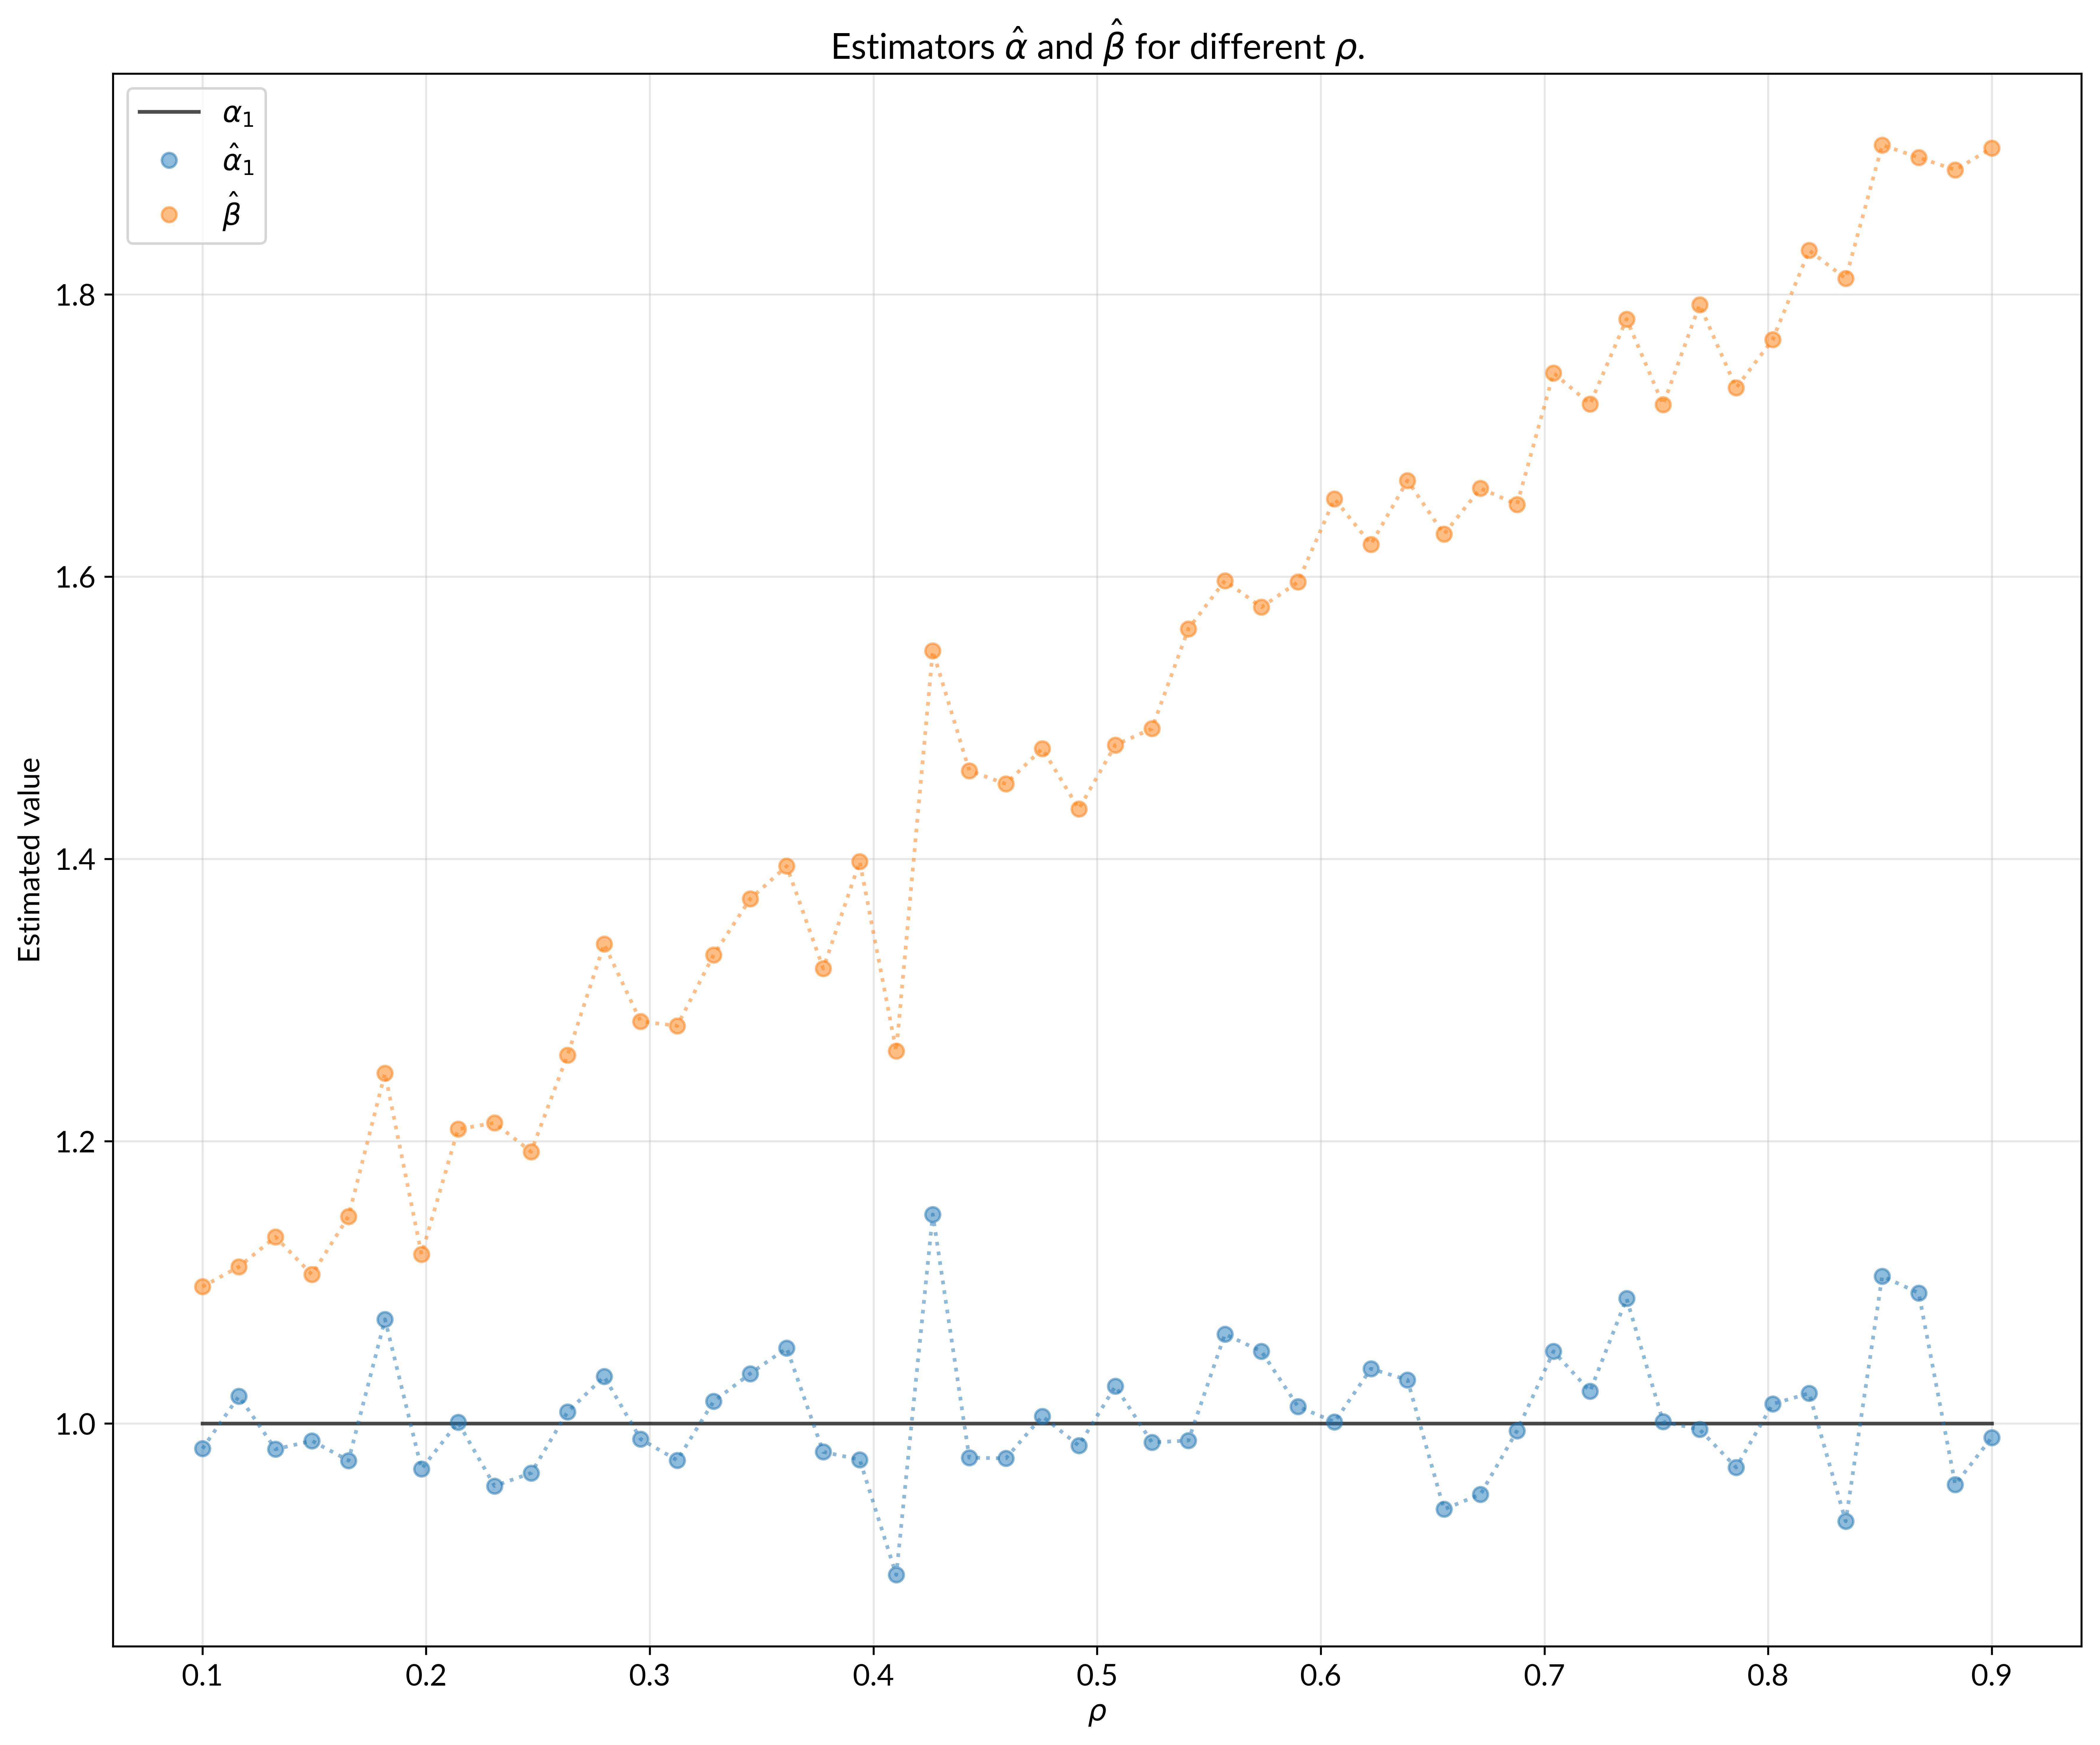

In [20]:
plt.plot(rhos, ALPHA[0] * np.ones_like(sizes), 'k', alpha=0.7, label=r"$\alpha_1$")
plt.plot(rhos, alpha_1s, 'o', color="tab:blue", alpha=0.5, label=r"$\hat\alpha_1$")
plt.plot(rhos, alpha_1s, ':', color="tab:blue", alpha=0.5)
plt.plot(rhos, betas, 'o', color="tab:orange", alpha=0.5, label=r"$\hat\beta$")
plt.plot(rhos, betas, ':', color="tab:orange", alpha=0.5)
plt.grid(alpha=0.3)
plt.xlabel(r"$\rho$")
plt.ylabel("Estimated value")
plt.title(r"Estimators $\hat\alpha$ and $\hat\beta$ for different $\rho$.")
plt.legend()

plt.tight_layout()
plt.show()

Here we can see even better see how the $\hat\beta$ estimator diverges from the true value when the correlation between the variables increases.